In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
import glob #list .txt file
pos_list=glob.glob("data\\movie-reviews-en\\train\\pos\\*.txt")
neg_list=glob.glob("data\\movie-reviews-en\\train\\neg\\*.txt")

In [3]:
#On crée un text contenant toutes les phrases, afin de compter les occurences de chaque mot
#Peut être pas la bonne maniere de faire, peut etre faire un decompte pour chaque phrase 
#et apres faire une moyenne d'ocurrence pour chaque mot

full_text = ''

for file in pos_list:
    f = open(file, "r")
    full_text += f.read()

for file in neg_list:
    f = open(file, "r")
    full_text += f.read()
    

In [4]:
import string
#On supprime la ponctuation et retour de ligne
full_text = full_text.translate(str.maketrans('', '', string.punctuation)).replace('\n','')

In [5]:
from collections import Counter
#On compte le nombre d'apparition de chaque mot
count = Counter(full_text.split())

In [6]:
len(count) #Nb de mots

45241

In [7]:
n_word = 200
most_common = count.most_common(n_word)
most_common[0:6]

[('the', 68395),
 ('a', 34165),
 ('and', 31648),
 ('of', 30420),
 ('to', 28507),
 ('is', 22511)]

In [8]:
n = len(pos_list)
data_pos = np.zeros((n,n_word))

for file,i in zip(pos_list,range(n)):
    f = open(file, "r")
    text = f.read()
    
    for j in range(0,n_word):
        
        if most_common[j][0] in text:
            data_pos[i][j]=text.split(' ').count(most_common[j][0])
        
        else:
            data_pos[i][j]=0 
      

In [9]:
data_pos

array([[42., 15., 19., ...,  0.,  0.,  0.],
       [28., 22., 17., ...,  1.,  0.,  0.],
       [32.,  9.,  9., ...,  0.,  0.,  0.],
       ...,
       [39., 16., 25., ...,  0.,  0.,  1.],
       [33., 13., 18., ...,  0.,  0.,  0.],
       [28., 15., 16., ...,  0.,  1.,  0.]])

In [10]:
n = len(neg_list)
data_neg = np.zeros((n,n_word))

for file,i in zip(neg_list,range(n)):
    f = open(file, "r")
    text = f.read()
    
    for j in range(0,n_word):
        
        if most_common[j][0] in text:
            data_neg[i][j]=text.split(' ').count(most_common[j][0])
        else:
            data_neg[i][j] =0 

In [11]:
data_neg

array([[36., 13., 19., ...,  0.,  0.,  0.],
       [11., 13.,  8., ...,  1.,  0.,  0.],
       [36., 10., 11., ...,  1.,  1.,  0.],
       ...,
       [23., 15.,  6., ...,  0.,  0.,  0.],
       [38., 13., 10., ...,  0.,  0.,  0.],
       [17.,  7., 14., ...,  0.,  1.,  1.]])

In [12]:
df_pos = pd.DataFrame(data=data_pos, dtype=np.int8)
df_neg = pd.DataFrame(data=data_neg, dtype=np.int8)
df_pos['res']=1
df_neg['res']=0
df = pd.concat([df_pos,df_neg])

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,res
0,42,15,19,14,14,7,16,3,6,2,...,0,1,0,0,0,0,0,0,0,1
1,28,22,17,12,14,22,12,10,7,4,...,0,0,0,0,0,0,1,0,0,1
2,32,9,9,10,7,7,6,5,5,9,...,2,0,1,0,0,0,0,0,0,1
3,57,33,29,27,15,22,16,5,18,9,...,1,1,0,1,2,1,2,1,0,1
4,40,19,18,15,15,11,17,3,0,2,...,1,1,0,1,1,0,0,0,0,1


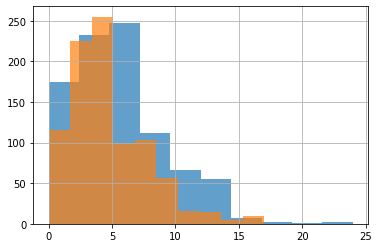

In [14]:
df[10][df['res']==1].hist(alpha=0.7)
df[10][df['res']==0].hist(alpha=0.7)

### SKlearn Test

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['res']), df['res'], test_size=0.3, random_state=42)

In [17]:
clf = GaussianNB()
y_pred = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.6833333333333333

In [16]:
#https://dridk.me/maximum-de-vraissemblance.html
#https://dridk.me/expectation-maximisation.html